# WeatherPy Analysis:
----

1. As expected weather become significantally warmer as it approches 0 Latitude. The Northern hemisphere's slope is negative that shows decrease in max temperature. The southern hemisphere's slope is positive that shows increase in mac temparature. 
2. There is no correlation between city latitude vs cloudiness and city latitude vs humidity. The slope almost looks like a straight line. 
3. There is no strong relationship between Latitude vs wind speed as well. 

In [1]:
# Dependencies
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from datetime import datetime

# Import API key
from api_keys import weather_api_key
# import citipy
from citipy import citipy

# range of latitues and Longitudes for random
lat_range = (-90, 90)
long_range = (-180, 180)
# create random latitudes and Longitude: change size to only 25 for testing
random_lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
random_longs = np.random.uniform(long_range[0], long_range[1], size=2000)
# zip the list together
zipped_lat_longs = zip(random_lats, random_longs)
lats_longs_list = list(zipped_lat_longs)


In [2]:
# for testing generate one city name
lat_long = lats_longs_list[0]

citipy.nearest_city(lat_long[0], lat_long[1]).city_name


'mitu'

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print('Start of Records')
print('------------------------')

# # generate emply list for cities
cities = []
# find nearest city from each lat and long
for lat_long in lats_longs_list:
    city_name = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
# if city is unique then added it to the cities list
    if city_name not in cities:
        cities.append(city_name)
# count number of citiies
# len(cities)


# create the url to call for API
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# create list to hold all the required items:
city_name_list = []
country_list = []
date_list = []
lat_list = []
long_list = []
temp = []
max_temp = []
humid = []
clouds = []
wind = []

# initiate counter for city number
number = 1
# loop thru the list of cities and permorm for data on each.
for city_name in cities:
    try:
        response = requests.get(city_url + city_name).json()
        city_name_list.append(response['name'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        lat_list.append(response['coord']['lat'])
        long_list.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing Record {number} of set {len(cities)} | {city_name}")
        number = number + 1
    
#     except KeyError:
    except:
        print(f"City not found")
#         if city not found, replace it with nan
        city_name_list.append(np.nan)
        country_list.append(np.nan)
        date_list.append(np.nan)
        lat_list.append(np.nan)
        long_list.append(np.nan)
        temp.append(np.nan)
        max_temp.append(np.nan)
        humid.append(np.nan)
        wind.append(np.nan)
        clouds.append(np.nan)
        
    continue
    print(f"City not found {number} of {len(cities)}. | Skipping {city_name}")
    number = number + 1

print('End of Records')
print('------------------------')


Start of Records
------------------------
Processing Record 1 of set 774 | mitu
Processing Record 2 of set 774 | east london
Processing Record 3 of set 774 | hobart
Processing Record 4 of set 774 | santa isabel do rio negro
Processing Record 5 of set 774 | bellavista
Processing Record 6 of set 774 | mataura
Processing Record 7 of set 774 | upernavik
Processing Record 8 of set 774 | lishan
Processing Record 9 of set 774 | port elizabeth
Processing Record 10 of set 774 | qaanaaq
Processing Record 11 of set 774 | dobrinka
Processing Record 12 of set 774 | pochutla
Processing Record 13 of set 774 | mar del plata
Processing Record 14 of set 774 | port alfred
Processing Record 15 of set 774 | airai
Processing Record 16 of set 774 | moron
Processing Record 17 of set 774 | kiunga
Processing Record 18 of set 774 | alofi
Processing Record 19 of set 774 | buchanan
Processing Record 20 of set 774 | forssa
Processing Record 21 of set 774 | lebu
Processing Record 22 of set 774 | kulhudhuffushi
Proce

Processing Record 182 of set 774 | tongchuan
Processing Record 183 of set 774 | santa rosalia
Processing Record 184 of set 774 | batagay-alyta
Processing Record 185 of set 774 | hervey bay
Processing Record 186 of set 774 | ahipara
Processing Record 187 of set 774 | puerto carreno
Processing Record 188 of set 774 | port-cartier
Processing Record 189 of set 774 | kosh-agach
Processing Record 190 of set 774 | puerto ayora
Processing Record 191 of set 774 | kargil
Processing Record 192 of set 774 | new norfolk
Processing Record 193 of set 774 | mana
Processing Record 194 of set 774 | saint anthony
Processing Record 195 of set 774 | hurghada
Processing Record 196 of set 774 | beringovskiy
Processing Record 197 of set 774 | chiang mai
Processing Record 198 of set 774 | bubaque
Processing Record 199 of set 774 | shugurovo
Processing Record 200 of set 774 | ketchikan
Processing Record 201 of set 774 | alugan
Processing Record 202 of set 774 | nemuro
Processing Record 203 of set 774 | miles ci

Processing Record 364 of set 774 | havoysund
Processing Record 365 of set 774 | castlemaine
Processing Record 366 of set 774 | astana
City not found
Processing Record 367 of set 774 | palmer
Processing Record 368 of set 774 | mehamn
Processing Record 369 of set 774 | neuquen
Processing Record 370 of set 774 | broken hill
Processing Record 371 of set 774 | dzhebariki-khaya
Processing Record 372 of set 774 | longyearbyen
Processing Record 373 of set 774 | adrar
Processing Record 374 of set 774 | zhigansk
Processing Record 375 of set 774 | san patricio
Processing Record 376 of set 774 | luanda
City not found
Processing Record 377 of set 774 | padang
Processing Record 378 of set 774 | areosa
Processing Record 379 of set 774 | hokitika
Processing Record 380 of set 774 | kahului
Processing Record 381 of set 774 | geraldton
Processing Record 382 of set 774 | esperance
Processing Record 383 of set 774 | fairbanks
Processing Record 384 of set 774 | hammerfest
Processing Record 385 of set 774 | 

Processing Record 547 of set 774 | manjacaze
Processing Record 548 of set 774 | crossfield
Processing Record 549 of set 774 | cranbrook
City not found
Processing Record 550 of set 774 | baiyin
Processing Record 551 of set 774 | antigonish
City not found
Processing Record 552 of set 774 | gairo
Processing Record 553 of set 774 | mae hong son
Processing Record 554 of set 774 | road town
Processing Record 555 of set 774 | itoman
Processing Record 556 of set 774 | pisco
Processing Record 557 of set 774 | boysun
Processing Record 558 of set 774 | pravia
Processing Record 559 of set 774 | whangamata
Processing Record 560 of set 774 | nizwa
City not found
Processing Record 561 of set 774 | haines junction
Processing Record 562 of set 774 | birin
Processing Record 563 of set 774 | wollongong
Processing Record 564 of set 774 | egvekinot
Processing Record 565 of set 774 | guerrero negro
Processing Record 566 of set 774 | richards bay
Processing Record 567 of set 774 | sarkand
Processing Record 5

In [4]:
# create DataFrame with the items:
city_data_df = pd.DataFrame({'City': city_name_list,
                             'Country': country_list,
                             'Date': date_list,
                             'Latitude': lat_list,
                             'Longitude': long_list,
                             'Temperature': temp,
                             'Max Temperature': max_temp,
                             'Humidity': humid,
                             'Clouds': clouds,
                             'Wind Speed': wind
    
})
city_data_df


,City,Country,Date,Latitude,Longitude,Temperature,Max Temperature,Humidity,Clouds,Wind Speed
0,Mitú,CO,1.627416e+09,1.1983,-70.1733,79.00,79.00,92.0,100.0,0.76
1,East London,ZA,1.627416e+09,-33.0153,27.9116,73.15,73.15,30.0,0.0,8.08
2,Hobart,AU,1.627416e+09,-42.8794,147.3294,54.70,55.92,68.0,61.0,4.00
3,Santa Isabel Rio Negro,BR,1.627416e+09,-0.4139,-65.0192,79.84,79.84,80.0,100.0,2.48
4,Bellavista,PE,1.627416e+09,-7.0561,-76.5911,90.88,92.48,55.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
769,Las Tunas,CU,1.627416e+09,20.9617,-76.9511,86.83,86.83,67.0,89.0,10.47
770,Jinxiang,CN,1.627416e+09,27.4327,120.6062,80.67,80.67,94.0,100.0,8.72
771,Tirumullaivāsal,IN,1.627416e+09,11.2333,79.8333,82.83,82.83,67.0,100.0,12.84
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
city_data_df = city_data_df.dropna(how="any")

city_data_df

,City,Country,Date,Latitude,Longitude,Temperature,Max Temperature,Humidity,Clouds,Wind Speed
0,Mitú,CO,1.627416e+09,1.1983,-70.1733,79.00,79.00,92.0,100.0,0.76
1,East London,ZA,1.627416e+09,-33.0153,27.9116,73.15,73.15,30.0,0.0,8.08
2,Hobart,AU,1.627416e+09,-42.8794,147.3294,54.70,55.92,68.0,61.0,4.00
3,Santa Isabel Rio Negro,BR,1.627416e+09,-0.4139,-65.0192,79.84,79.84,80.0,100.0,2.48
4,Bellavista,PE,1.627416e+09,-7.0561,-76.5911,90.88,92.48,55.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
766,Derzhavīnsk,KZ,1.627416e+09,51.1000,66.3167,60.84,60.84,46.0,5.0,5.55
767,Boshnyakovo,RU,1.627416e+09,49.6333,142.1667,65.64,65.64,90.0,97.0,2.55
769,Las Tunas,CU,1.627416e+09,20.9617,-76.9511,86.83,86.83,67.0,89.0,10.47
770,Jinxiang,CN,1.627416e+09,27.4327,120.6062,80.67,80.67,94.0,100.0,8.72


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# check the DataFrame for cities that have Humidity above 100
# Skip this step if there are no cities that have humidity > 100%.
humidity_100 = city_data_df[city_data_df["Humidity"]>100]
humidity_100

,City,Country,Date,Latitude,Longitude,Temperature,Max Temperature,Humidity,Clouds,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# save the DataFrame as csv
city_data_df.to_csv("weather_data.csv", index = False)

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

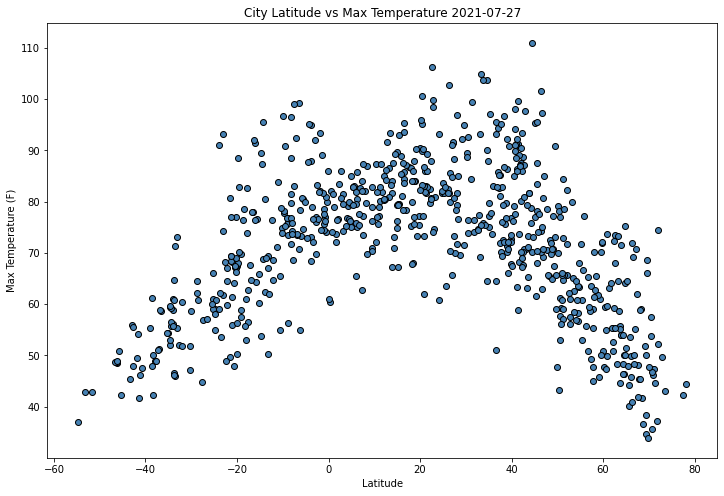

<Figure size 432x288 with 0 Axes>

In [16]:
# plot Latitude vs. Temp plot - of course we will use scatter plot
date_time = datetime.date(datetime.now())
fig1,ax1 = plt.subplots(figsize=(12,8))
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temperature'], facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

plt.show()
# save the plotted figure as .pngs
plt.savefig("City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

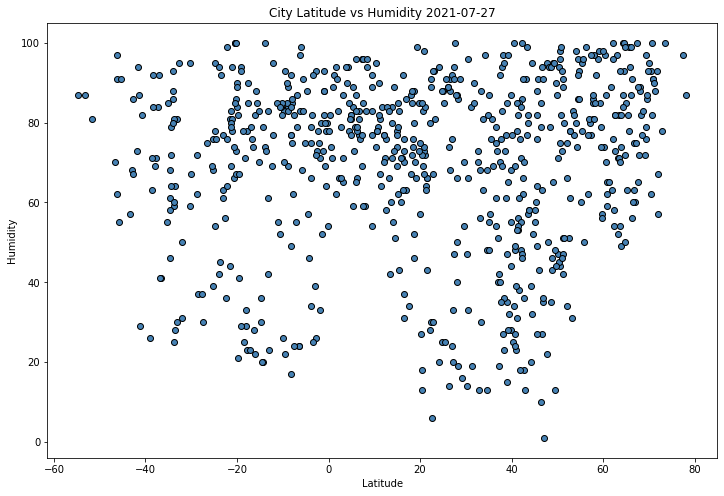

<Figure size 432x288 with 0 Axes>

In [18]:
# plot Latitude vs. Humidity plot - of course we will use scatter plot
fig1,ax1 = plt.subplots(figsize=(12,8))
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], facecolor = "steelblue", edgecolor = "black")

plt.title(f"City Latitude vs Humidity {date_time}")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()
# save the plotted figure as .pngs
plt.savefig("City Latitude vs Humidity (%).png")

## Latitude vs. Cloudiness Plot

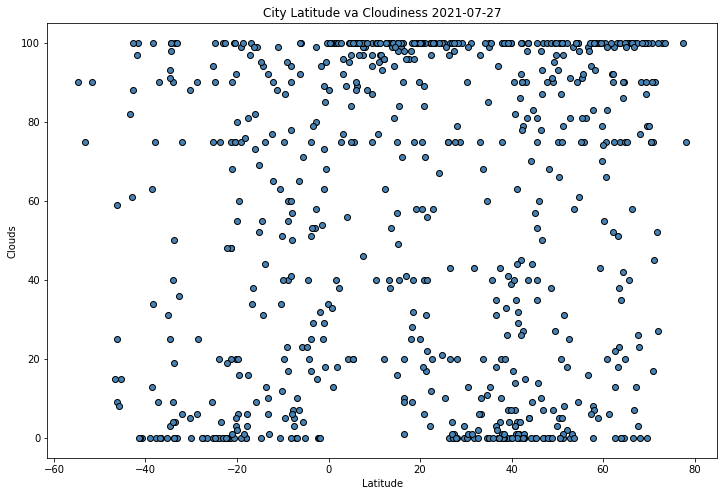

<Figure size 432x288 with 0 Axes>

In [19]:
# plot Latitude vs. Cloudiness plot - of course we will use scatter plot
fig1,ax1 = plt.subplots(figsize=(12,8))
plt.scatter(city_data_df['Latitude'], city_data_df['Clouds'], facecolor = "steelblue", edgecolor = "black")

plt.title(f'City Latitude va Cloudiness {date_time}')
plt.ylabel('Clouds')
plt.xlabel('Latitude')
plt.show()
# save the plotted figure as .pngs
plt.savefig("City Latitude vs Cloudiness (%).png")

## Latitude vs. Wind Speed Plot

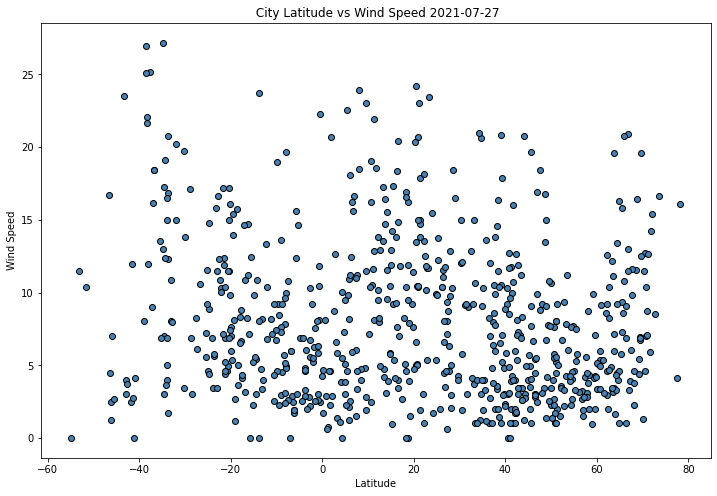

<Figure size 432x288 with 0 Axes>

In [20]:
# plot Latitude vs. Cloudiness plot - of course we will use scatter plot
fig1,ax1 = plt.subplots(figsize=(12,8))
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], facecolor = "steelblue", edgecolor = "black")

plt.title(f' City Latitude vs Wind Speed {date_time}')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()
# save the plotted figure as .pngs
plt.savefig("City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [21]:
# create Northern and Southern Hemisphere DF
northern_hem = city_data_df.loc[city_data_df["Latitude"] >= 0]
southern_hem = city_data_df.loc[city_data_df["Latitude"] < 0]

In [22]:
northern_hem

,City,Country,Date,Latitude,Longitude,Temperature,Max Temperature,Humidity,Clouds,Wind Speed
0,Mitú,CO,1.627416e+09,1.1983,-70.1733,79.00,79.00,92.0,100.0,0.76
6,Upernavik,GL,1.627416e+09,72.7868,-56.1549,49.69,49.69,78.0,100.0,8.50
7,Lishan,CN,1.627416e+09,31.8576,113.2951,76.35,76.35,90.0,43.0,8.99
9,Qaanaaq,GL,1.627416e+09,77.4840,-69.3632,42.30,42.30,97.0,100.0,4.14
10,Dobrinka,RU,1.627416e+09,52.1653,40.4731,65.68,65.68,75.0,18.0,3.56
...,...,...,...,...,...,...,...,...,...,...
766,Derzhavīnsk,KZ,1.627416e+09,51.1000,66.3167,60.84,60.84,46.0,5.0,5.55
767,Boshnyakovo,RU,1.627416e+09,49.6333,142.1667,65.64,65.64,90.0,97.0,2.55
769,Las Tunas,CU,1.627416e+09,20.9617,-76.9511,86.83,86.83,67.0,89.0,10.47
770,Jinxiang,CN,1.627416e+09,27.4327,120.6062,80.67,80.67,94.0,100.0,8.72


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.39124308045742917
y = -0.45x + 90.06


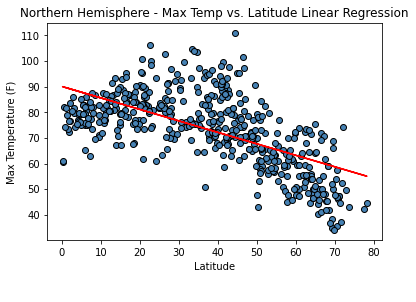

<Figure size 432x288 with 0 Axes>

In [23]:
# Add the Linear regression for Northern Hemishpere
x_values = northern_hem["Latitude"]
y_values = northern_hem["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red")
# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()
# save the plotted figure as .pngs
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.570495820089285
y = 0.79x + 82.86


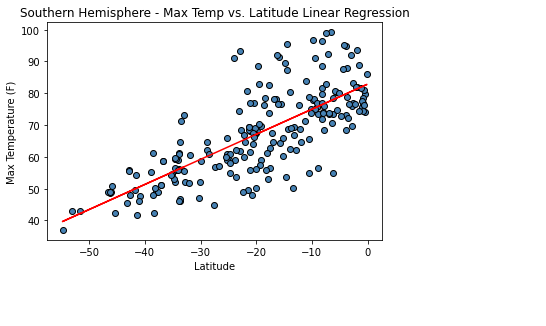

<Figure size 432x288 with 0 Axes>

In [24]:
# Add the Linear regression for Southern
x_values = southern_hem["Latitude"]
y_values = southern_hem["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red")
# set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
# set x and y labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()
# save the plotted figure as .pngs
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0028132101062313918
y = 0.06x + 67.67


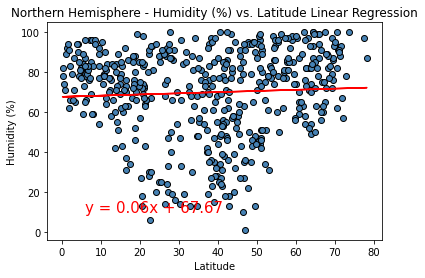

<Figure size 432x288 with 0 Axes>

In [25]:
# Add the Linear regression for Northern Hemishpere
x_values = northern_hem["Latitude"]
y_values = northern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red")
# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()
# save the plotted figure as .pngs
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0002421843824183126
y = -0.03x + 67.73


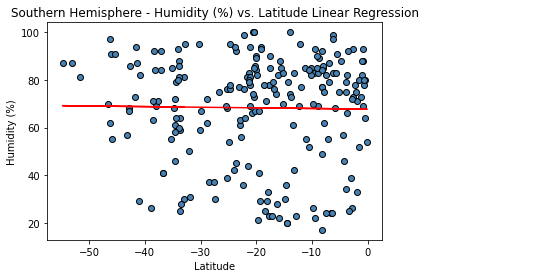

<Figure size 432x288 with 0 Axes>

In [26]:
# Add the Linear regression for Southern Hemishpere
x_values = southern_hem["Latitude"]
y_values = southern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red")
# Set a title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()
# save the plotted figure as .pngs
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01726996783837134
y = -0.26x + 69.79


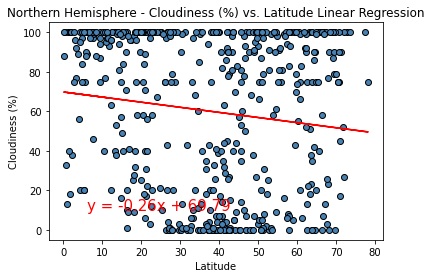

<Figure size 432x288 with 0 Axes>

In [27]:
# Add the Linear regression for Northern Hemishpere
x_values = northern_hem["Latitude"]
y_values = northern_hem["Clouds"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red")
# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()
# save the plotted figure as .pngs
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0011576986016502405
y = 0.1x + 46.38


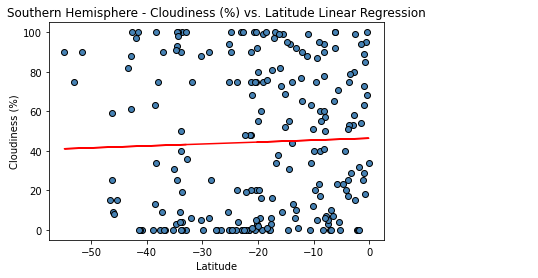

<Figure size 432x288 with 0 Axes>

In [28]:
# Add the Linear regression for Southern Hemishpere
x_values = southern_hem["Latitude"]
y_values = southern_hem["Clouds"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red")
# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()
# save the plotted figure as .pngs
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.023746719224397368
y = -0.04x + 9.14


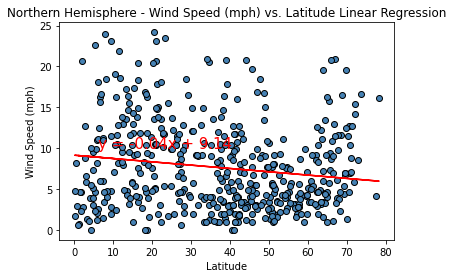

<Figure size 432x288 with 0 Axes>

In [29]:
# Add the Linear regression for Northern Hemishpere
x_values = northern_hem["Latitude"]
y_values = northern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red")
# Set a title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()
# save the plotted figure as .pngs
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07333080234150546
y = -0.12x + 6.23


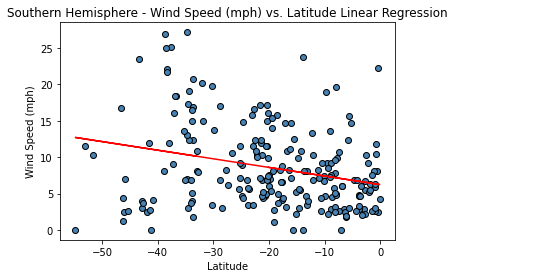

<Figure size 432x288 with 0 Axes>

In [30]:
# Add the Linear regression for Southern Hemishpere
x_values = southern_hem["Latitude"]
y_values = southern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red")
# Set a title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Print r value
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()
# save the plotted figure as .pngs
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")